# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

%matplotlib notebook


<IPython.core.display.Javascript object>


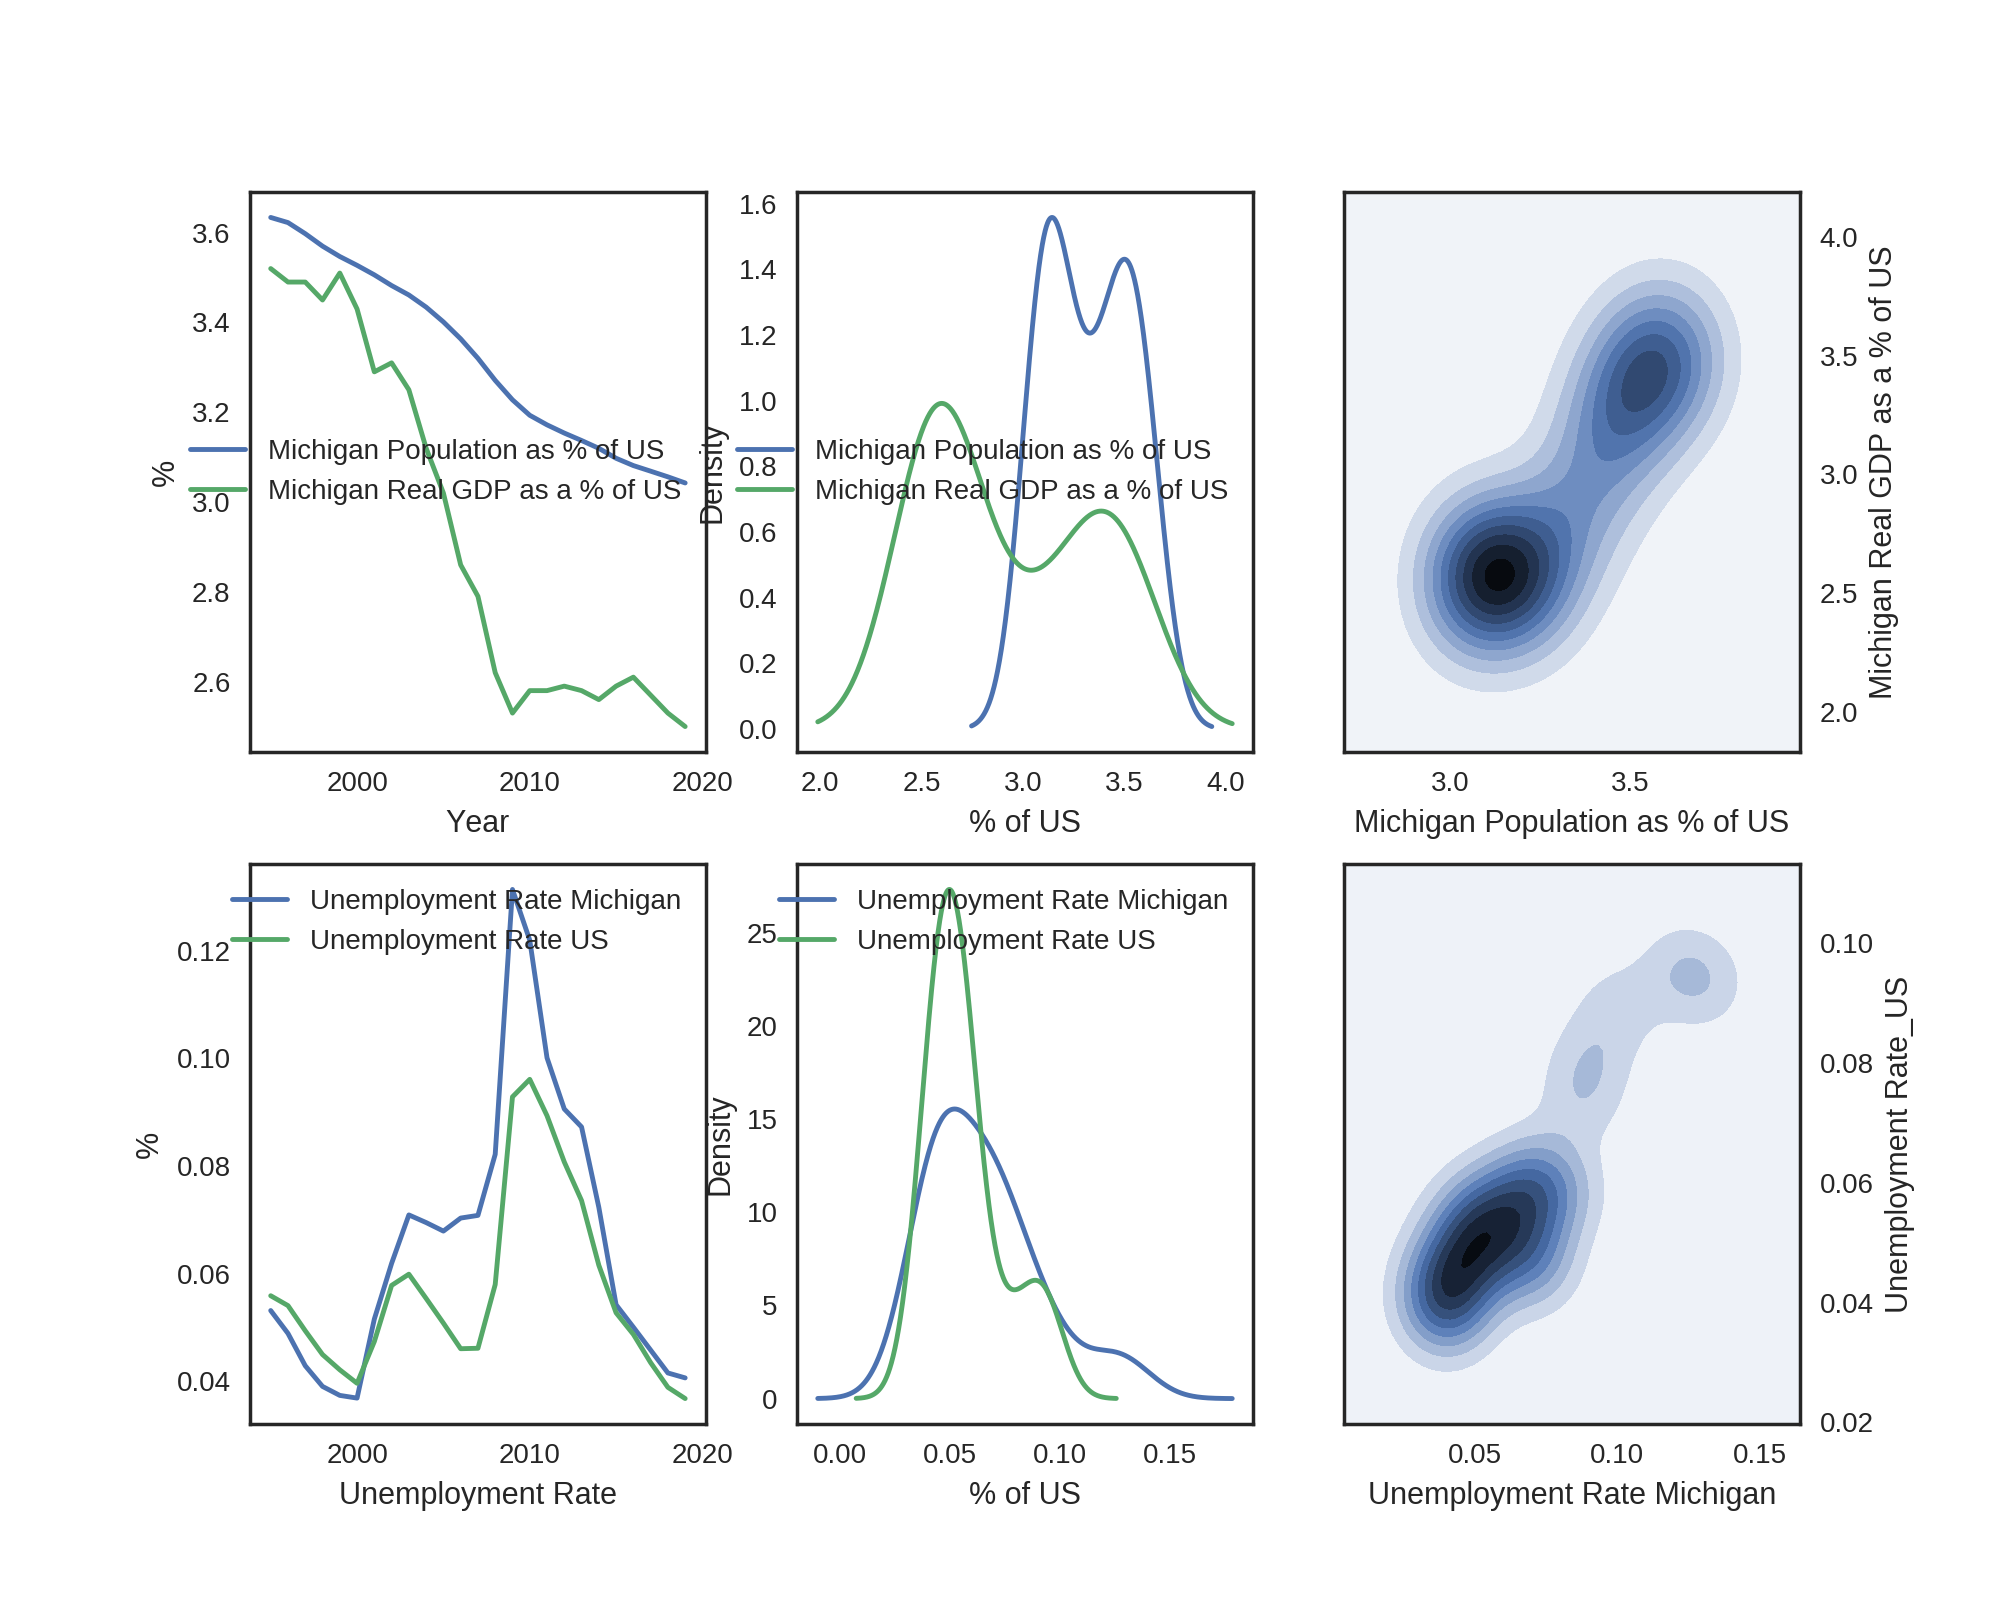

<IPython.core.display.Javascript object>


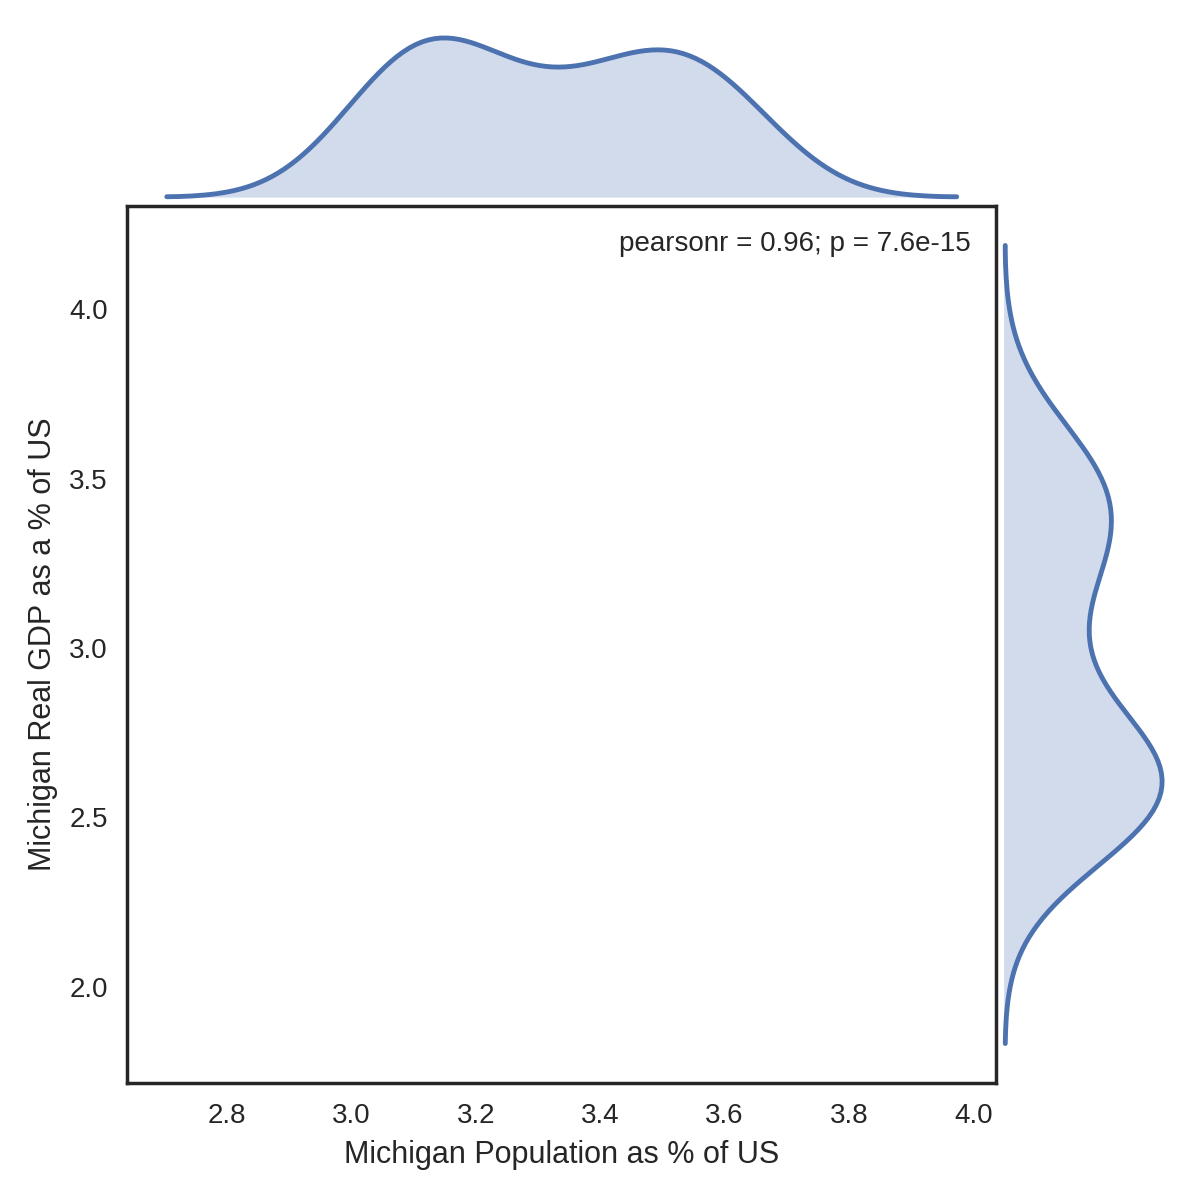

In [156]:
# Question1:
# Is the decline of Michigan state population in terms of % of total US Population, related to the
# decline of Michigan state GDP in terms of % of US national GDP from the years 1995-2019?
# In other words are relative decline of Michigan state population and relative decline of GDP
# of Michigan state inter related?

# Data Source:
# Michigan and US Population data from https://data.michigan.gov/History/Michigan-Population/4fpi-4kt2
# CSV : https://data.michigan.gov/api/views/4fpi-4kt2/rows.csv?accessType=DOWNLOAD&bom=true&format=true
#
# Michigan_Real_GDP_as_percentage_of_US data from https://data.michigan.gov/Economy/Michigan-Real-GDP-as-a-of-US/9t8i-vwv3
# CSV : https://data.michigan.gov/api/views/9t8i-vwv3/rows.csv?accessType=DOWNLOAD&bom=true&format=true

# Data from main source is copied to perosnal github for easily reading the data in this Jupyter notebook 

#  Michigan and US Population
url_michigan_and_us_population = "https://raw.githubusercontent.com/RamanGupta16/ML/master/data/Michigan_Population.csv"
df1 = pd.read_csv(url_michigan_and_us_population)
df1 = df1.drop(['Calendar Date', 'Rank', 'Highlights'], axis=1).replace(",", "",regex=True).rename(columns={"Date":"Year"})
#df1.Year = pd.to_numeric(df1.Year) # Convert specific column 'Year' to numeric
df1 = df1.apply(pd.to_numeric, errors='ignore') # Convert everything to numeric
df1 = df1[(df1['Year'] >= 1995) & (df1['Year'] < 2020)]
df1 = df1.set_index('Year')
df1['Michigan Population as % of US'] = df1['Population_MI']/df1['Population_US']*100
#print(df1.head())

# Michigan Real GDP as % of total US GDP
url_michigan_Real_GDP_as_percentage_of_US = "https://raw.githubusercontent.com/RamanGupta16/ML/master/data/Michigan_Real_GDP_as_percentage_of_US.csv"
df2 = pd.read_csv(url_michigan_Real_GDP_as_percentage_of_US)
df2 = df2.drop('Highlights', axis=1)
df2.Year = pd.to_numeric(df2.Year) # Convert Year column from String to Int
df2 = df2[(df2['Year'] >= 1995) & (df2['Year'] < 2020)]
df2 = df2.set_index('Year')
#print(df2.head())

df3 = pd.DataFrame({'Michigan Population as % of US': list(df1['Michigan Population as % of US']),
                    'Michigan Real GDP as a % of US': list(df2['Michigan Real GDP as a % of US'])}, 
                   index=list(df1.index))
#print(df3)
result = stats.pearsonr(df3['Michigan Population as % of US'], df3['Michigan Real GDP as a % of US'])
#print(result)

plt.figure("Main Figure",figsize=(10,8))

# Plot Line graph of 'Michigan Population as % of US' and 'Michigan Real GDP as a % of US'
plt.subplot(231)
plt.plot(list(df1.index), df3['Michigan Population as % of US'], label='Michigan Population as % of US')
plt.plot(list(df1.index), df3['Michigan Real GDP as a % of US'], label='Michigan Real GDP as a % of US')
plt.legend();
plt.gca().set_ylabel("%");
plt.gca().set_xlabel("Year");

# Plot KDE
plt.subplot(232)
ax = df3.plot.kde(ax=plt.gca());
ax.set_xlabel("% of US");

# SNS JointPlot
ax=plt.subplot(233)
sns.set_style('white') # set the seaborn style for all the following plots
sns.jointplot(df3['Michigan Population as % of US'], df3['Michigan Real GDP as a % of US'], kind='kde', space=0, ax=plt.gca())
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel('Michigan Real GDP as a % of US');
ax.set_xlabel('Michigan Population as % of US');

<IPython.core.display.Javascript object>


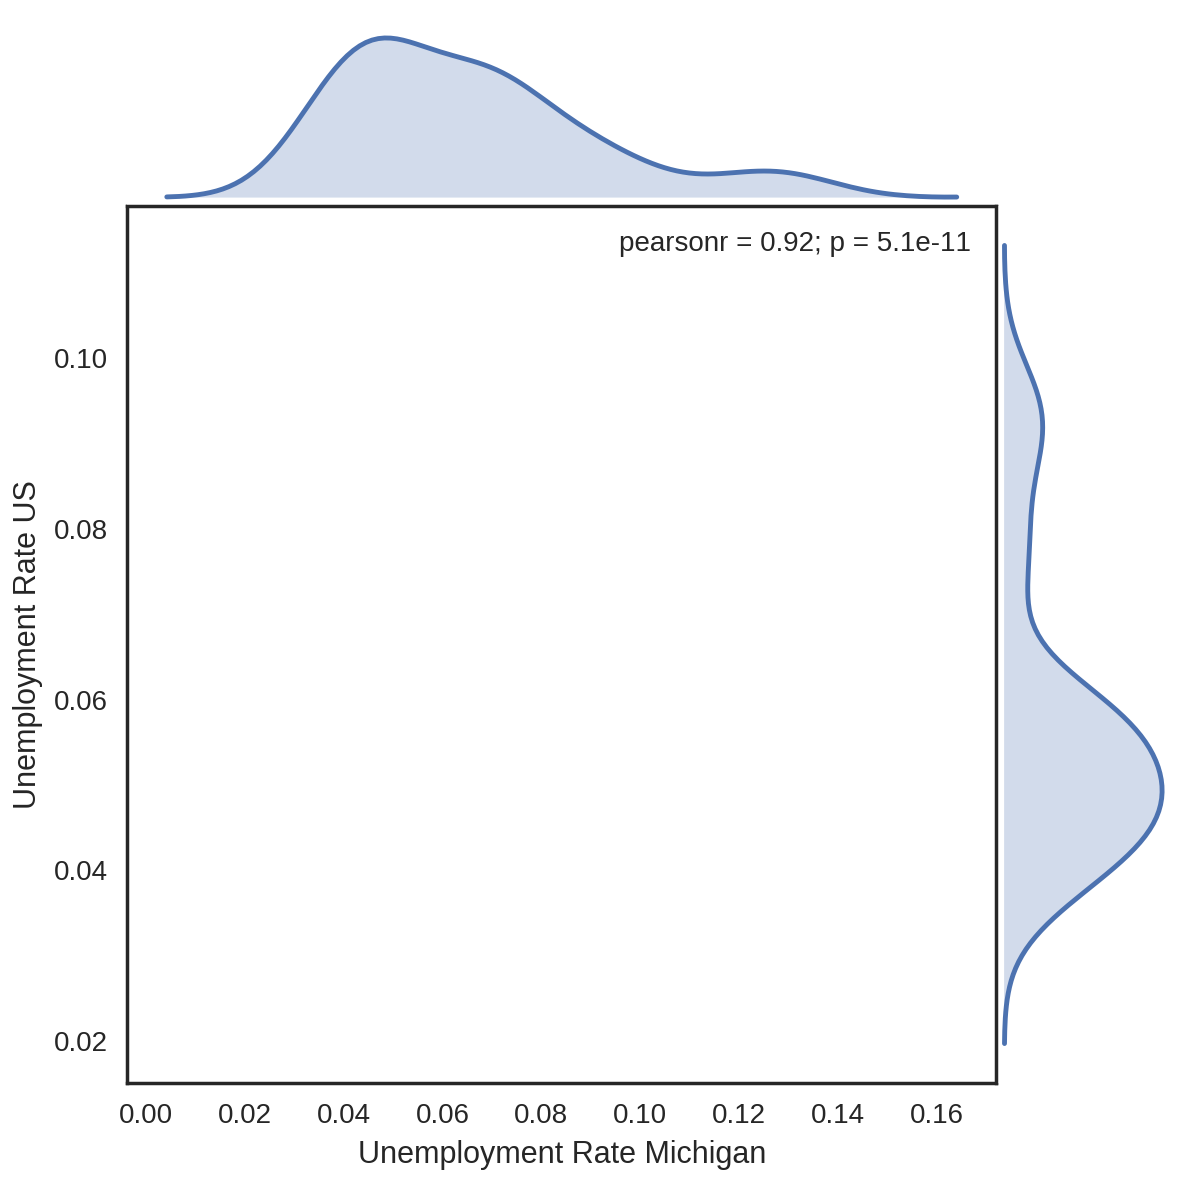

In [157]:
# Question2: 
# Comparison of unemployment rates in Michigan states vs nation unemployment rates in US?

# Data Source:
# Michigan Unemployment Rate
# https://data.michigan.gov/Economy/Unemployment-Rate/kamp-ngb9
# CSV : https://data.michigan.gov/api/views/kamp-ngb9/rows.csv?accessType=DOWNLOAD&bom=true&format=true

# Data from main source is copied to perosnal github for easily reading the data in this Jupyter notebook 

import re

plt.figure("Main Figure")

# Michigan Unemployment Rate
df4 = pd.read_csv("https://raw.githubusercontent.com/RamanGupta16/ML/master/data/Unemployment_Rate.csv")

df4['Year'] = None
def get_year(row):
    match = re.match("[\d]{2}/[\d]{2}/(?P<Year>[\d]{4}) [\w\d: ]+", row['Calendar Date'])
    if match:
        row['Year'] = pd.to_numeric(match.group('Year'))
    return row

df4 = df4.apply(get_year, axis=1)
df4 = df4.drop(['Calendar Date', 'Date', 'Rank', 'Highlights'], axis=1)
df4 = df4[ (df4['Year'] >= 1995) & (df4['Year'] <=2019)]
df4 = df4.set_index('Year')
df4 = df4.groupby(df4.index).mean()
df4 = df4.rename(columns={'Unemployment_Rate_MI':'Unemployment Rate Michigan', 'Unemployment_Rate_US':'Unemployment Rate US'})
#print(df4)

#df4.plot()
plt.subplot(234)
plt.plot(list(df1.index), df4['Unemployment Rate Michigan'], label='Unemployment Rate Michigan')
plt.plot(list(df1.index), df4['Unemployment Rate US'], label='Unemployment Rate US')
plt.legend();
plt.gca().set_ylabel("%");
plt.gca().set_xlabel("Unemployment Rate");

plt.subplot(235)
ax = df4.plot.kde(ax=plt.gca());
ax.set_xlabel("% of US");

ax=plt.subplot(236)
sns.jointplot(df4['Unemployment Rate Michigan'], df4['Unemployment Rate US'], kind='kde', space=0, ax=plt.gca());
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel('Unemployment Rate US');
ax.set_xlabel('Unemployment Rate Michigan');

<IPython.core.display.Javascript object>


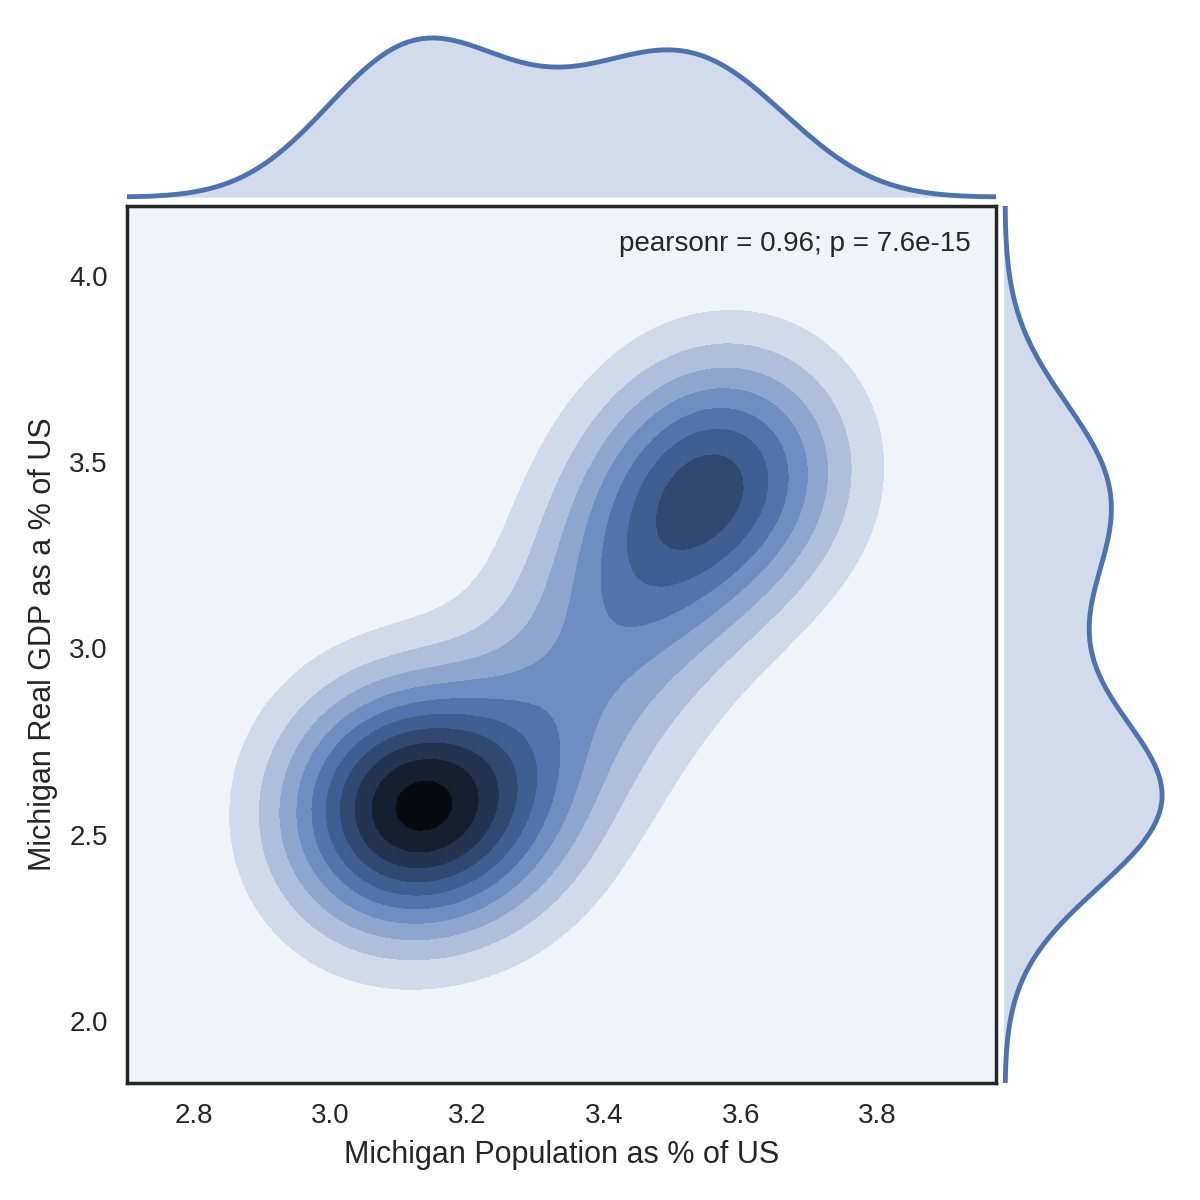

In [158]:
# Q1 Jointplot 
# set the seaborn style for all the following plots
sns.set_style('white')
sns.jointplot(df3['Michigan Population as % of US'], df3['Michigan Real GDP as a % of US'], kind='kde', space=0);

<IPython.core.display.Javascript object>


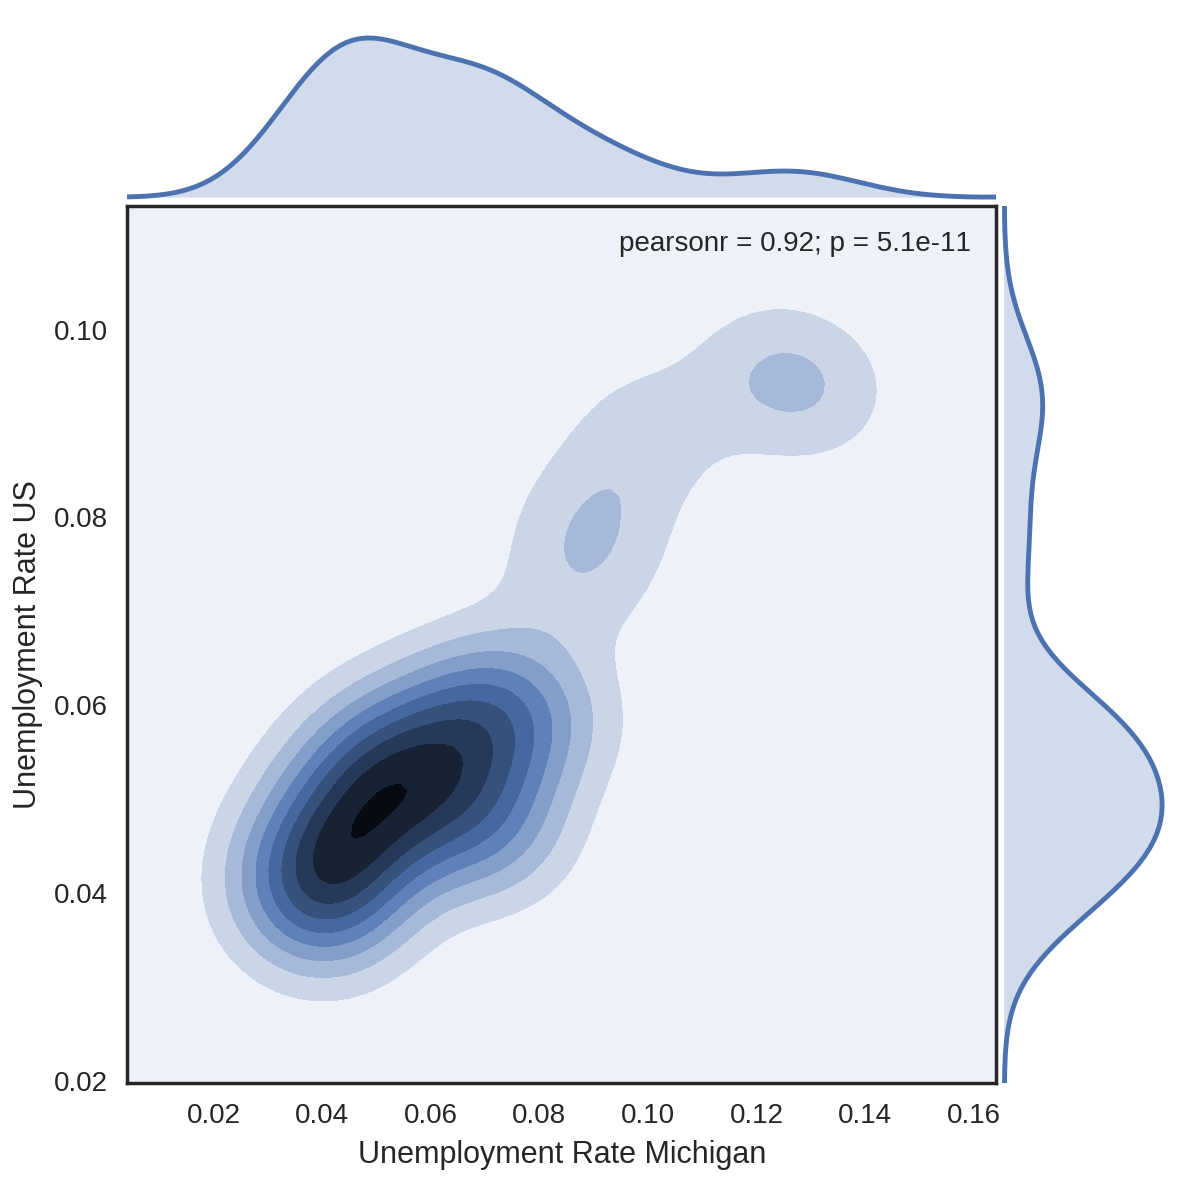

In [160]:
# Q2 Jointplot
sns.set_style('white')
sns.jointplot(df4['Unemployment Rate Michigan'], df4['Unemployment Rate US'], kind='kde', space=0);

In [96]:
# Answer1:
#1. From the plots it can be seen that there is a steady decline in the Michigan state
#   population as % of total US Population and there is greater decline of Michigan state
#   GDP as % of US national GDP from the years 1995-2019.  Though there was a minor spurt
#   in GDP % in 1999 but overall trend is declining, inline with decline in population.
#
#2. KDE plot shows that probability density functions of the 2 variables are similar.
#
#3. The Pearson’s correlation coefficient=0.96486442115403082 and p-value=7.5862593117038406e-15
#   shows that they are correlated
#
#4. The relative decline of Michigan state population causes reduction of working age
#    population which directly affects Michigan state GDP.


In [ ]:
# Answer2:
#
# 1. LinePlot shows that unemployement rates of Michigan are consistently higher than national US average.
# 2. LinePlot and KDEPlot shows that unemployement rates of Michigan are related to overall unemployement rates of US
# 3. KDEPlot shows that Pearson correlation coefficent = 0.92 and p-value = 5.1e-11 and thus high correlation